In [0]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
import io
from keras.utils.data_utils import get_file
import string
import re

Using TensorFlow backend.


In [0]:
path = get_file("debatcapres_2000.txt", origin="https://transfer.sh/11av6E/debatcapres_2000.txt")
with io.open(path, encoding="utf-8") as f:
  text = f.read().lower()
print(len(text))

16384/13176 [=====================================] - 0s 6us/step
13176


# 1. Summary and keywords extraction

## Split Sentence

In [0]:
def split_sentences(text):
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

In [0]:
sentences = split_sentences(text)
print("Sentence lenght: ", len(sentences))
print('--------------------------')
print(sentences)

Sentence lenght:  43
--------------------------
["the last debate that addresses crucial issues for the nation is economic problems, social problems, investment issues, and our industry, holds our nation's view today and has long been hanging in the wrong direction", 'this direction, if continued, would not provide actual assistance to the indonesian people', ' this proves that we have deviated from the ideals of our nation in the constitution of one thousand one hundred and forty', " it is very clear that our economic design is very clear, the national flow out of the country and the fact is and is being reviewed by the government now about indonesia's national wealth flowing abroad more money belonging to indonesian citizens abroad in the country", 'then it has happened in industrialization if other countries our industrialization in industrialization now the indonesian people do not produce anything - we can only accept production materials from other nations', ' this is wrong, we m

## Split into token

In [0]:
def split_into_tokens(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [0]:
tokens = split_into_tokens(text)
print("Token lenght: ", len(tokens))
print('--------------------------')
print(tokens)

Token lenght:  2430
--------------------------
['the', 'last', 'debate', 'that', 'addresses', 'crucial', 'issues', 'for', 'the', 'nation', 'is', 'economic', 'problems', ',', 'social', 'problems', ',', 'investment', 'issues', ',', 'and', 'our', 'industry', ',', 'holds', 'our', 'nation', "'s", 'view', 'today', 'and', 'has', 'long', 'been', 'hanging', 'in', 'the', 'wrong', 'direction.this', 'direction', ',', 'if', 'continued', ',', 'would', 'not', 'provide', 'actual', 'assistance', 'to', 'the', 'indonesian', 'people', '.', 'this', 'proves', 'that', 'we', 'have', 'deviated', 'from', 'the', 'ideals', 'of', 'our', 'nation', 'in', 'the', 'constitution', 'of', 'one', 'thousand', 'one', 'hundred', 'and', 'forty', '.', 'it', 'is', 'very', 'clear', 'that', 'our', 'economic', 'design', 'is', 'very', 'clear', ',', 'the', 'national', 'flow', 'out', 'of', 'the', 'country', 'and', 'the', 'fact', 'is', 'and', 'is', 'being', 'reviewed', 'by', 'the', 'government', 'now', 'about', 'indonesia', "'s", 'nati

## Pos Tagging

In [0]:
def POS_tagging(text):
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

In [0]:
POS_tagging(tokens)

[('the', 'DT'),
 ('last', 'JJ'),
 ('debate', 'NN'),
 ('that', 'WDT'),
 ('addresses', 'VBZ'),
 ('crucial', 'JJ'),
 ('issues', 'NNS'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('nation', 'NN'),
 ('is', 'VBZ'),
 ('economic', 'JJ'),
 ('problems', 'NNS'),
 (',', ','),
 ('social', 'JJ'),
 ('problems', 'NNS'),
 (',', ','),
 ('investment', 'NN'),
 ('issues', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('our', 'PRP$'),
 ('industry', 'NN'),
 (',', ','),
 ('holds', 'VBZ'),
 ('our', 'PRP$'),
 ('nation', 'NN'),
 ("'s", 'POS'),
 ('view', 'NN'),
 ('today', 'NN'),
 ('and', 'CC'),
 ('has', 'VBZ'),
 ('long', 'RB'),
 ('been', 'VBN'),
 ('hanging', 'VBG'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wrong', 'JJ'),
 ('direction.this', 'JJ'),
 ('direction', 'NN'),
 (',', ','),
 ('if', 'IN'),
 ('continued', 'VBN'),
 (',', ','),
 ('would', 'MD'),
 ('not', 'RB'),
 ('provide', 'VB'),
 ('actual', 'JJ'),
 ('assistance', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('indonesian', 'JJ'),
 ('people', 'NNS'),
 ('.', '.'),
 ('this', 'DT'),
 ('prove

## Get Keyword

In [0]:
def get_keywords(text):
    res = keywords(text, ratio=0.1, words=None, split=False, scores=True, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

In [0]:
print('Keywords', )
print('--------------------------')
print(get_keywords(text))

Keywords
--------------------------
['production', 'products', 'product', 'productive', 'economic', 'economics', 'islamic', 'people', 'tax', 'taxes', 'economy', 'prabowo', 'women', 'halal', 'need', 'needed', 'needs', 'increase', 'increasing', 'increases', 'program', 'programs', 'flow', 'flowing', 'indonesia', 'president', 'digital', 'digitally', 'development', 'developing', 'developed', 'develop', 'industry', 'industrialization', 'industrialize', 'industries', 'policy', 'policies', 'markets', 'market', 'marketing', 'good', 'goods', 'created', 'create', 'thank', 'business', 'businesses', 'employment', 'world', 'indonesian', 'work', 'working', 'steps', 'better', 'investment', 'god']


## Get Summary

In [0]:
def get_summary(text, pct):
    summary = summarize(text,ratio=pct,split=True)
    return summary

In [0]:
print('Printing Summary')
print('--------------------------')
summary = get_summary(text, 0.1)
print("Sentence lenght of Origin: ",len(sentences))
print("Sentence lenght of Summary: ",len(summary))
print('--------------------------')
print(summary)

Printing Summary
--------------------------
Sentence lenght of Origin:  43
Sentence lenght of Summary:  3
--------------------------
["jokowi has been in power for four and a half years why permits the importation of farmers to be destroyed why does not industrialize but is focused on infrastructure don't make it easier for foreign goods to enter indonesia instead of indonesian goods coming out this is an issue we say there needs to be a reorientation of development strategies there needs to be a strict policy to stop the flow money out of the country then focus on building industries in all fields i agree to downstream but why don't you implement it for four and a half years even you allow the minister allows foreign commodities to enter indonesia so rapidly and so easily i think so maybe.", 'how do we provide a sustainable program we call it password prabowo call it the first seven steps right is to register these great women independent women who will be the backbone of our second e

# 2. Visualization

## Preprocessing

In [0]:
def preprocessing(text):    
    # Remove punctuation & special characters
    tokens = re.sub('[^ a-zA-Z0-9]', '', text)
    
    # Tokenize
    tokens = split_into_tokens(tokens)    
    
    # Remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    preprocessed_text = tokens
    return preprocessed_text 

In [0]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [0]:
normalized = preprocessing(text)
normalized

'last debate address crucial issue nation economic problem social problem investment issue industry hold nation view today long hanging wrong directionthis direction continued would provide actual assistance indonesian people prof deviated ideal nation constitution one thousand one hundred forty clear economic design clear national flow country fact reviewed government indonesia national wealth flowing abroad money belonging indonesian citizen abroad countrythen happened industrialization country industrialization industrialization indonesian people produce anything accept production material nation wrong must change prabowo philosophy development strategyour country rich thank god last month campaign fifteen hundred percent visit met deep blue people spreading spirit optimism people entrusted mandate complaint mother mother millennial young people asking today theme theme economy main theme referred economic referendum see hear directly community need hard work smart work thorough wor

## Analyze the frequency of words in the text.

In [0]:
count = {}
mostfrequent = []
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 5:
        print("%s was found %d times" % (word, times))
        mostfrequent.append(word)

nation was found 8 times
economic was found 7 times
indonesian was found 8 times
people was found 16 times
one was found 11 times
country was found 10 times
government was found 7 times
indonesia was found 9 times
must was found 12 times
prabowo was found 6 times
development was found 7 times
economy was found 12 times
need was found 8 times
work was found 7 times
good was found 6 times
year was found 9 times
great was found 6 times
create was found 8 times
woman was found 16 times
also was found 8 times
program was found 6 times
believe was found 7 times
able was found 9 times
trillion was found 6 times
tax was found 11 times
opportunity was found 6 times
islamic was found 7 times
halal was found 6 times
product was found 10 times


## Create a Dispersion plot

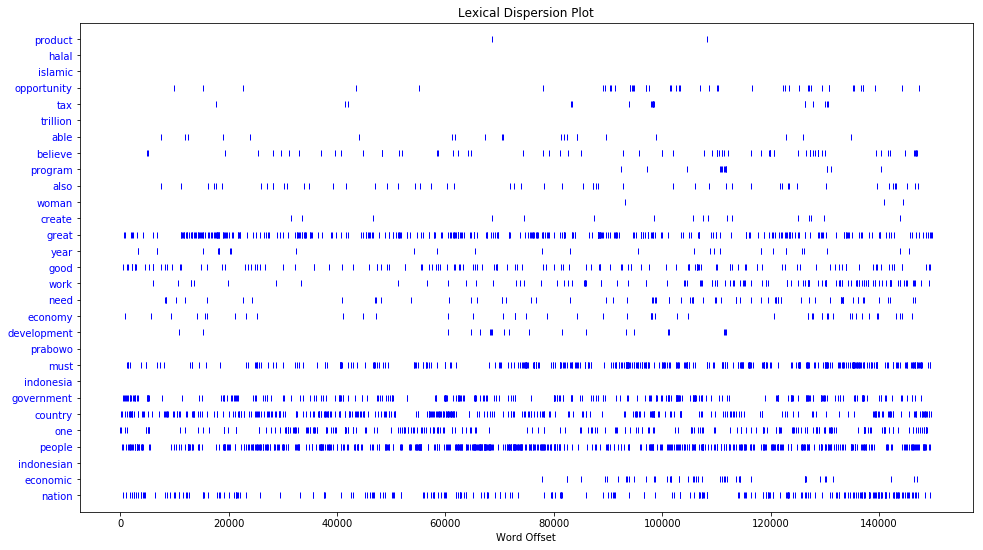

In [0]:
from nltk.book import text4 as content
plt.figure(figsize=(16,9))
topics = mostfrequent
content.dispersion_plot(topics)

## Create the wordcloud visualization on the processed data

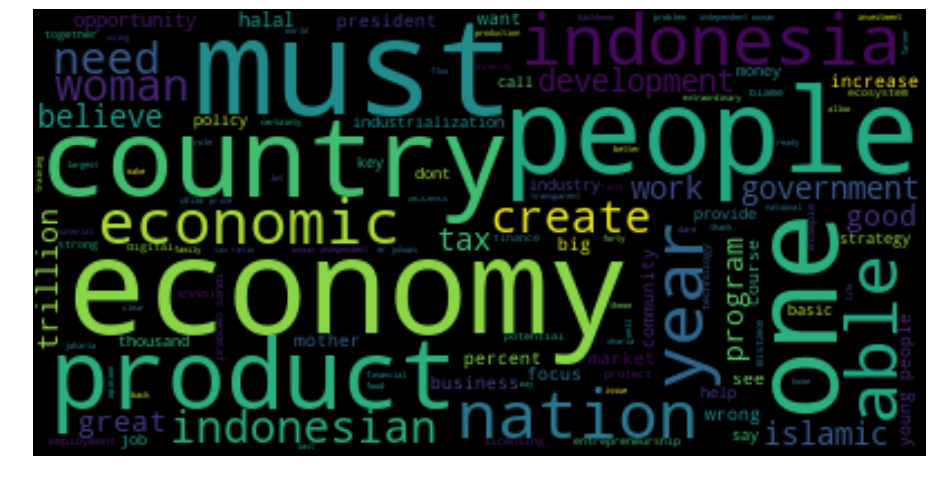

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()